# I. Lý thuyết

1) Transfer Learning thường được thực hiện trên hai dữ liệu nguồn (huấn luyện mô hình nguồn) và dữ liệu đích (huấn luyện mô hình đích) thế nào ?


**A. Dữ liệu nguồn và dữ liệu đích có sự liên quan tới nhau. Những đặc trưng trong dữ liệu đích xuất hiện ở những dữ liệu nguồn.**

B. Dữ liệu nguồn có số lượng classes lớn hơn dữ liệu đích.

C. Kích thước của dữ liệu nguồn rất nhỏ.

D. Dữ liệu đích ít liên quan tới dữ liệu nguồn.


2) Khi nào thì chúng ta nên thực hiện fine tuning trên toàn bộ các layers của mô hình đích ?

**A. Khi hai dữ liệu nguồn và đích có mức độ tương đồng cao và dữ liệu đích có kích thước lớn.**

B. Khi hai dữ liệu nguồn và đích có mức độ tương đồng cao và dữ liệu đích có kích thước nhỏ.

C. Dữ liệu đích có kích thước nhỏ và dữ liệu mục tiêu có kích thước lớn.

D. Cả hai dữ liệu đích và mục tiêu đều có kích thước nhỏ.


3) Các phương pháp augmentation nào sẽ kết hợp nội dung từ hai ảnh lẫn nhau và tạo ra một nhãn mềm (_soft label_) cho ảnh?

A. Rotation, Random Crop, MixUp

B. Bright Constrast, Color Shift, Addition Noise

**C. CutMix, MixUp**

D. Flip, Information Loss 


4) Quá trình xây dựng một mô hình AI trong dự án là một chu trình Machine Learning Cycle kế hợp giữa huấn luyện và gán nhãn dữ liệu. Để tiết kiệm chi phí gán nhãn chúng ta nên sử dụng phương pháp nào ?

A. Lấy mẫu ngẫu nhiên từ tập unlabeled dataset để thực hiện gán nhãn.

**B. Sử dụng Active Learning để lựa chọn mẫu mang lại thông tin giúp cải thiện nhiều nhất cho hiệu suất mô hình.**

C. Lựa chọn mô hình pretrained lớn nhất có thể.

D. Chỉ lựa các dữ liệu có thông tin rõ ràng, có thể phân biệt được bởi con người.

5) Mô hình lớn thường đạt độ chính xác cao nhưng không deploy được trên các thiết bị edge device, IoT,... Trong khi mô hình nhỏ có thể deploy được nhưng thường có độ chính xác thấp. Phương pháp nào có thể giúp mô hình nhỏ cải thiện được độ chính xác ? Có thể lựa chọn nhiều đáp án.

**A. Sử dụng active learning để lựa chọn các mẫu đại diện cho tổng thể để huấn luyện mô hình nhỏ.**

B. Áp dụng augmentation để huấn luyện mô hình nhỏ.

C. Fine tuning các layers của mô hình lớn sang mô hình nhỏ.

**D. Sử dụng knowledge distillation để chuyển giao tri thức từ mô hình lớn sang mô hình nhỏ.**

# II. Thực hành

##6) Từ bộ dữ liệu [Dog and Cat](https://www.kaggle.com/c/dog-vs-cat-classification/data), hãy huấn luyện một mô hình large (chẳng hạn ResNet50) bằng cách fine-tuning lại các trọng số từ pretrained model của bộ dữ liệu ImageNet. Huấn luyện trên 5 epochs.

In [ ]:
from google.colab import drive
import os
drive.mount("/content/drive")
folder_path = "/content/drive/MyDrive/DLK1/Data_Cat_Dog/"
os.chdir(folder_path)

Mounted at /content/drive


In [ ]:
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator, load_img
import tensorflow

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
import random

In [ ]:
import keras
#from tensorflow.keras.optimizers import SGD
import matplotlib.image as mpimg
from PIL import Image

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input,decode_predictions
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

In [ ]:
from matplotlib import pyplot
from matplotlib.image import imread

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
data_folder = '/content/drive/MyDrive/DLK1/Data_Cat_Dog/train'

In [ ]:
img_size = (224, 224)
batch_size = 50

print("Getting Data...")
datagen = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             validation_split=0.1) # hold back 30% of the images for validation

print("Preparing training dataset...")
train_generator = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

print("Preparing validation dataset...")
validation_generator = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

classnames = list(train_generator.class_indices.keys())
print('Data generators ready')

Getting Data...
Preparing training dataset...
Found 22500 images belonging to 2 classes.
Preparing validation dataset...
Found 2500 images belonging to 2 classes.
Data generators ready


In [ ]:
print(train_generator.labels)

In [ ]:
labels = (train_generator.class_indices)
print(labels)

{'cats': 0, 'dogs': 1}


In [ ]:
model = Sequential()
model.add(ResNet50(include_top=False, pooling='max', input_shape=(224,224,3)))
model.add(Dense(2, activation='softmax'))


94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in model.layers[:]:
  layer.trainable = True

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
H=model.fit(train_generator,epochs=5,
            steps_per_epoch = train_generator.samples // batch_size,
            validation_data=validation_generator)

Epoch 1/5
 20/450 [>.............................] - ETA: 9:45 - loss: 0.8775 - accuracy: 0.5880

In [ ]:
fig = plt.figure()
numOfEpoch = 5
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['acc'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_acc'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

##7) Hãy huấn luyện một mô hình small (chẳng hạn MobileNetV3) không sử dụng pretrained model trên 1 epochs.

In [ ]:
import os
import zipfile 
import random
import numpy as np 
import pandas as pd 
import seaborn as sns

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
np.random.seed(9)
tf.random.set_seed(9)

In [ ]:
train_path_dog = '/content/drive/MyDrive/DLK1/Data_Cat_Dog/train/dogs/'
filenames = os.listdir(train_path_dog)

In [ ]:
print(filenames)

['cats', 'dogs']


In [ ]:
def listToString(s): 
    
    # initialize an empty string
    str1 = " " 
    
    # return string  
    return (str1.join(s))

In [ ]:
print(f"First 12 filenames: \n {os.listdir('/content/drive/MyDrive/DLK1/Data_Cat_Dog/train/cats')[:1]}")

First 12 filenames: 
 ['cat.9170.jpg']


In [ ]:
def readData(path):
  filenames = os.listdir(path)
  labels, heights, widths, channels, filesize = [], [], [], [], []

  for fname in filenames:
      labels.append(str(fname)[:3])
      img_shape = mpimg.imread(path+fname).shape
      heights.append(img_shape[0])
      widths.append(img_shape[1])
      channels.append(img_shape[2])
      filesize.append(os.path.getsize(path+fname))
  df = pd.DataFrame({'filename': filenames, 
                           'label': labels, 
                           'height': heights, 
                           'width': widths, 
                           'channels': channels, 
                           'filesize': filesize})
  return df

In [ ]:
df_dogs = readData('/content/drive/MyDrive/DLK1/Data_Cat_Dog/train/dogs/')

In [ ]:
df_cats = readData('/content/drive/MyDrive/DLK1/Data_Cat_Dog/train/cats/')

In [ ]:
train_df = pd.concat([df_dogs, df_cats])

In [ ]:
train_df.head()

In [ ]:
train_df.tail()

dog    12500
cat    12500
Name: label, dtype: int64


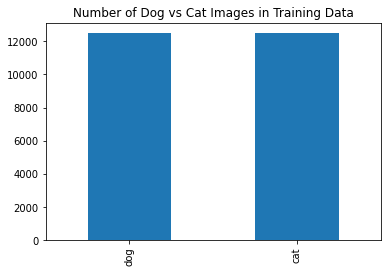

In [ ]:
print((train_df['label']).value_counts())
dogsVScats_count = train_df['label'].value_counts().plot.bar(title='Number of Dog vs Cat Images in Training Data')

In [ ]:
def _show(path):
  nrows = 3
  ncols = 3
  filenames = os.listdir(path)
  fig = plt.gcf()
  fig.set_size_inches(ncols*4, nrows*4)

  for i in range(nrows*ncols):
      sample = np.random.choice(filenames)
      img_path = path+sample
      sp = plt.subplot(nrows, ncols, i + 1)
      sp.axis('Off')
      img = mpimg.imread(img_path)
      plt.imshow(img)
      plt.title(sample[:3])

  plt.show()

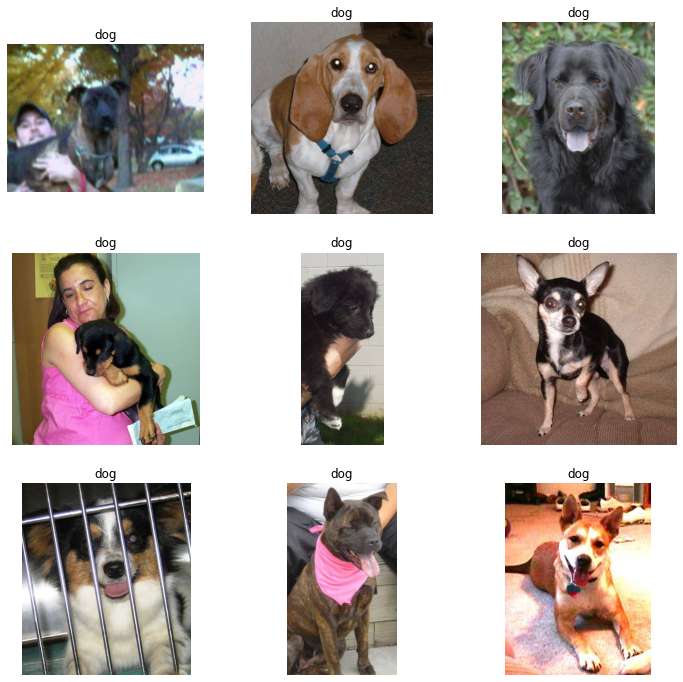

In [ ]:
_show("/content/drive/MyDrive/DLK1/Data_Cat_Dog/train/dogs/")

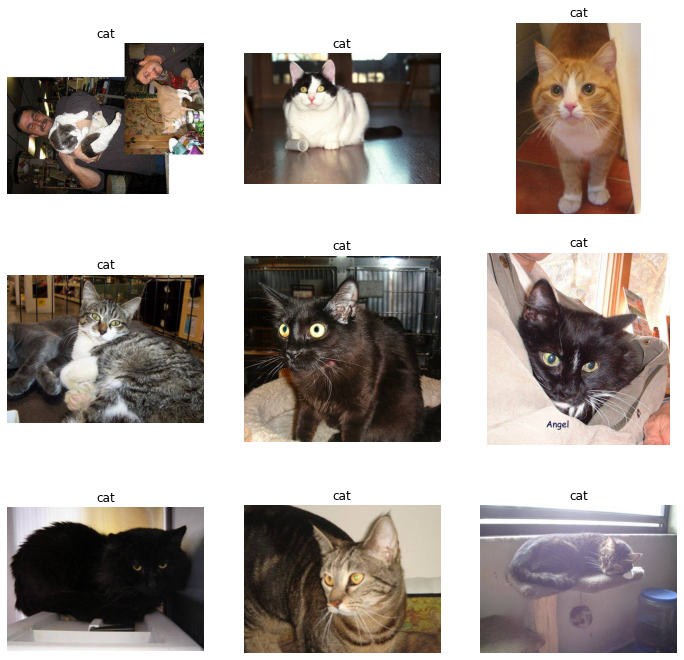

In [ ]:
_show("/content/drive/MyDrive/DLK1/Data_Cat_Dog/train/cats/")

In [ ]:
train_set_df, dev_set_df = train_test_split(train_df[['filename', 'label']], test_size=0.2, random_state = 42, shuffle=True, stratify=train_df['label'])
print(train_set_df.shape, dev_set_df.shape)

(20000, 2) (5000, 2)


In [ ]:
train_set_df.head()

In [ ]:
train_datagen = ImageDataGenerator( rescale = 1.0/255,
                                    rotation_range=40,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest' )

validation_datagen  = ImageDataGenerator( rescale = 1.0/255 )

Found 1 validated image filenames belonging to 1 classes.


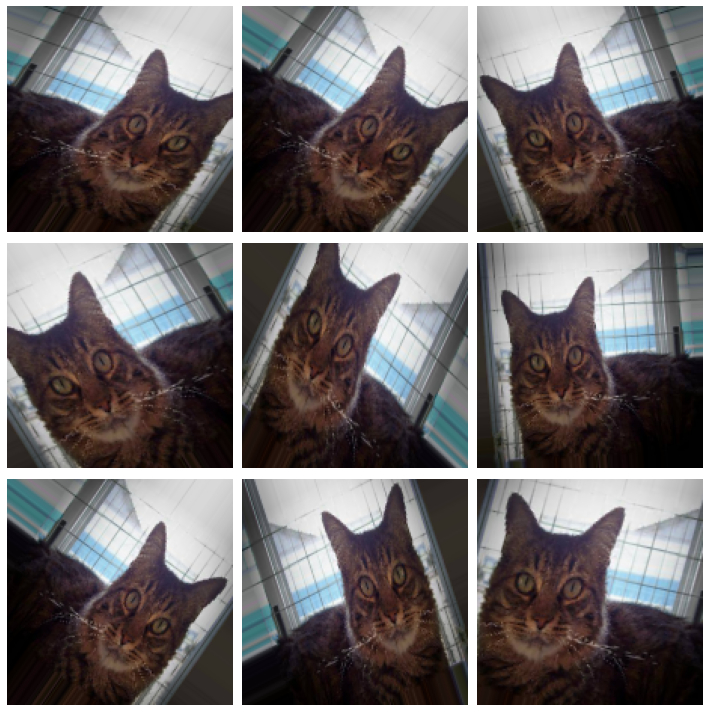

In [ ]:
sample = train_df.sample(n=1)
sample_generator = train_datagen.flow_from_dataframe(
    sample, 
    "/content/drive/MyDrive/DLK1/Data_Cat_Dog/train/cats/", 
    x_col='filename',
    y_col='label',
    target_size=(150,150),
    class_mode='categorical'
)

plt.figure(figsize=(10, 10))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for x_batch, y_batch in sample_generator:
        image = x_batch[0]
        plt.imshow(image)
        plt.axis('Off')
        break
plt.tight_layout()
plt.show()

In [ ]:
sample.head()

,filename,label,height,width,channels,filesize
3918,cat.7462.jpg,cat,269,338,3,16774


In [ ]:
from keras.applications.mobilenet_v3 import MobileNetV3Small

In [ ]:
base_model = MobileNetV3Small(input_shape=(224,224,3),include_top=False,weights='imagenet',pooling='avg')
base_model.trainable = True
prediction_layer = Dense(2,activation="softmax")

4349952/4334752 [==============================] - 0s 0us/step


In [ ]:
student = Sequential([base_model,prediction_layer], name='student')

In [ ]:
student.build(input_shape=(None, 224,224,3))

In [ ]:
student.summary()

Model: "student"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 576)               939120    
_________________________________________________________________
dense (Dense)                (None, 2)                 1154      
Total params: 940,274
Trainable params: 928,162
Non-trainable params: 12,112
_________________________________________________________________


In [ ]:
student.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_accuracy', mode='max',patience=2,restore_best_weights=True)

In [ ]:
Hs = student.fit(train_generator,epochs=1,
                      steps_per_epoch = train_generator.samples // batch_size,
                      validation_data=validation_generator,
                      callbacks=[es])

450/450 [==============================] - ETA: 0s - loss: 0.1435 - accuracy: 0.9411 

##8) Sử dụng mô hình large làm teacher để cải thiện mô hình small là student theo phương pháp knowledge distillation.

In [ ]:
# Imports
import tensorflow as tf
tf.random.set_seed(666)

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import models
from tensorflow.keras import layers

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import matplotlib.pyplot as plt

In [ ]:
train_ds, validation_ds = tfds.load(
    "cats_vs_dogs",
    split=["train[:85%]", "train[85%:]"],
    as_supervised=True
)

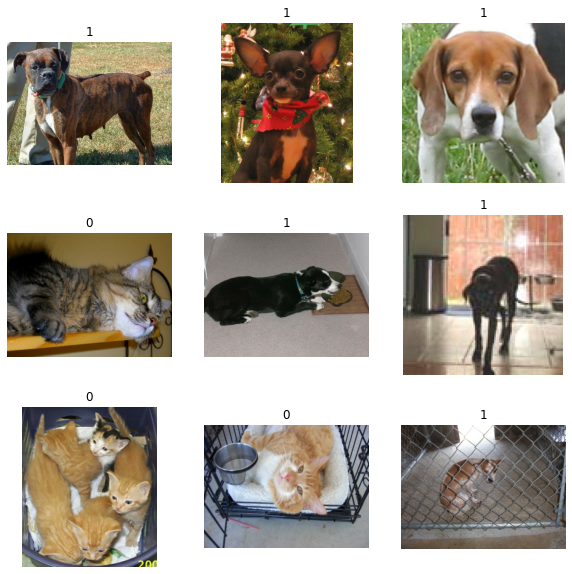

In [ ]:
# Visualization
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(int(label))
    plt.axis("off")

In [ ]:
SIZE = (224, 224)

def preprocess_image(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, SIZE)
    return (image, label)

In [ ]:
BATCH_SIZE = 64
AUTO = tf.data.experimental.AUTOTUNE

train_ds = (
    train_ds
    .map(preprocess_image, num_parallel_calls=AUTO)
    .cache()
    .shuffle(1024)
    .batch(BATCH_SIZE)
    .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
)

validation_ds = (
    validation_ds
    .map(preprocess_image, num_parallel_calls=AUTO)
    .cache()
    .batch(BATCH_SIZE)
    .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
)

In [ ]:
# Teacher model
base_model = MobileNetV2(weights="imagenet", include_top=False,
        input_shape=(224, 224, 3))
base_model.trainable = True

def get_teacher_model():
    inputs = layers.Input(shape=(224, 224, 3))
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(2)(x)
    classifier = models.Model(inputs=inputs, outputs=x)
    
    return classifier

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
get_teacher_model().summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,226,434
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
# Define loss function and optimizer
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5) 

In [ ]:
# Train the teacher model
teacher_model = get_teacher_model()
teacher_model.compile(loss=loss_func, optimizer=optimizer, metrics=["accuracy"])
teacher_model.fit(train_ds,
                  validation_data=validation_ds,
                  epochs=5)

Epoch 1/5
181/309 [================>.............] - ETA: 19:09 - loss: 0.0933 - accuracy: 0.9656

In [ ]:
print("Test accuracy: {:.2f}".format(teacher_model.evaluate(validation_ds)[1]*100))
teacher_model.save_weights("teacher_model.h5")

In [ ]:
# Student model
def get_student_model(deeper=False):
    student_model = models.Sequential()
    student_model.add(layers.Conv2D(64, (3, 3), 
        input_shape=(224, 224, 3), 
        activation="relu",
        kernel_initializer="he_normal"))
    student_model.add(layers.MaxPooling2D((4, 4)))
    
    student_model.add(layers.Conv2D(128, (3, 3), 
        activation="relu",
        kernel_initializer="he_normal"))
    
    if deeper:
        student_model.add(tf.keras.layers.MaxPooling2D((4, 4)))
        student_model.add(tf.keras.layers.Conv2D(256, (3, 3), 
            activation="relu",
            kernel_initializer="he_normal"))
    
    student_model.add(layers.GlobalAveragePooling2D())
    student_model.add(layers.Dense(512, activation='relu'))
    student_model.add(layers.Dense(2))

    return student_model

In [ ]:
get_student_model().summary()

In [ ]:
# Average the loss across the batch size within an epoch
train_loss = tf.keras.metrics.Mean(name="train_loss")
valid_loss = tf.keras.metrics.Mean(name="test_loss")

# Specify the performance metric
train_acc = tf.keras.metrics.SparseCategoricalAccuracy(name="train_acc")
valid_acc = tf.keras.metrics.SparseCategoricalAccuracy(name="valid_acc")

In [ ]:
# Define the training loop

def get_kd_loss(student_logits, teacher_logits, 
                true_labels, temperature,
                alpha, beta):
    teacher_probs = tf.nn.softmax(teacher_logits / temperature)
    kd_loss = tf.keras.losses.categorical_crossentropy(
        teacher_probs, student_logits / temperature, 
        from_logits=True)
    
    ce_loss = tf.keras.losses.sparse_categorical_crossentropy(
        true_labels, student_logits, from_logits=True)
    
    total_loss = (alpha * kd_loss) + (beta * ce_loss)
    return total_loss / (alpha + beta)

class Student(tf.keras.Model):
    def __init__(self, trained_teacher, student, 
                 temperature=5., alpha=0.9, beta=0.1):
        super(Student, self).__init__()
        self.trained_teacher = trained_teacher
        self.student = student
        self.temperature = temperature
        self.alpha = alpha
        self.beta = beta

    def train_step(self, data):
        images, labels = data
        teacher_logits = self.trained_teacher(images)
        
        with tf.GradientTape() as tape:
            student_logits = self.student(images)
            loss = get_kd_loss(student_logits, teacher_logits,  
                               labels, self.temperature,
                               self.alpha, self.beta)
        gradients = tape.gradient(loss, self.student.trainable_variables)
        gradients = [gradient * (self.temperature ** 2) for gradient in gradients]
        self.optimizer.apply_gradients(zip(gradients, self.student.trainable_variables))

        train_loss.update_state(loss)
        train_acc.update_state(labels, tf.nn.softmax(student_logits))
        t_loss, t_acc = train_loss.result(), train_acc.result()
        train_loss.reset_states(), train_acc.reset_states()
        return {"train_loss": t_loss, "train_accuracy": t_acc}

    def test_step(self, data):
        images, labels = data
        teacher_logits = self.trained_teacher(images)
        
        student_logits = self.student(images, training=False)
        loss = get_kd_loss(student_logits, teacher_logits,  
                               labels, self.temperature,
                               self.alpha, self.beta)
        
        valid_loss.update_state(loss)
        valid_acc.update_state(labels, tf.nn.softmax(student_logits))
        v_loss, v_acc = valid_loss.result(), valid_acc.result()
        valid_loss.reset_states(), valid_acc.reset_states()
        return {"loss": v_loss, "accuracy": v_acc}

In [ ]:
student = Student(teacher_model, get_student_model())
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
student.compile(optimizer)

student.fit(train_ds, 
            validation_data=validation_ds,
            epochs=5)

In [ ]:
import xml.etree.ElementTree as ET
from pathlib import Path
import pandas as pd

In [ ]:
img_size = (224, 224)
batch_size = 50

print("Getting Data...")
img_gen = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             validation_split=0.1) # hold back 30% of the images for validation

Getting Data...


In [ ]:
img_size = (224, 224)
batch_size = 50

print("Getting Data...")
datagenDF = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             validation_split=0.1) # hold back 30% of the images for validation

Getting Data...


In [ ]:
print("Preparing training dataset...")
train_generator = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

print("Preparing validation dataset...")
validation_generator = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

classnames = list(train_generator.class_indices.keys())
print('Data generators ready')

Preparing training dataset...
Found 22500 images belonging to 2 classes.
Preparing validation dataset...
Found 2500 images belonging to 2 classes.
Data generators ready


https://medium.com/analytics-vidhya/knowledge-distillation-in-a-deep-neural-network-c9dd59aff89b

In [ ]:
from keras.applications.mobilenet_v3 import MobileNetV3Large

In [ ]:
base_teacher = MobileNetV3Large(input_shape=(224,224,3),include_top=False,weights='imagenet',pooling='avg')
base_teacher.trainable = True
prediction_layer = Dense(2,activation="softmax")

12697600/12683000 [==============================] - 1s 0us/step


In [ ]:
teacher = Sequential([base_teacher,prediction_layer], name='teacher')

In [ ]:
teacher.build(input_shape=(None, 224,224,3))

In [ ]:
teacher.summary()

Model: "teacher"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_1 (ModuleWrap (None, 960)               2996352   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1922      
Total params: 2,998,274
Trainable params: 2,973,874
Non-trainable params: 24,400
_________________________________________________________________


Tổng số tham số huấn luyện trong mô hình `teacher` là 2,973,874, trong khi đó mô hình `student` chỉ là 928,162

In [ ]:
teacher.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [ ]:
Ht = teacher.fit(train_generator,epochs=5,
                      steps_per_epoch = train_generator.samples // batch_size,
                      validation_data=validation_generator,
                      callbacks=[es])

Epoch 1/5
450/450 [==============================] - ETA: 0s - loss: 0.0944 - accuracy: 0.9628

Distill the Knowledge from the Teacher Model to the Student Model

Create a Distiller class to distill the knowledge using the student and distillation loss.

- The student loss function is the difference between student predictions and ground-truth using the softmax function where T=1.

- The distillation loss function is the difference between the soft student predictions and the soft teacher labels.

In [ ]:
class Distiller(keras.Model):
    def __init__(self, student, teacher):
        super(Distiller, self).__init__()
        self.teacher = teacher
        self.student = student
    def compile(
        self,
        optimizer,
        metrics,
        student_loss_fn,
        distillation_loss_fn,
        alpha=0.1,
        temperature=3,
    ):
        """ Configure the distiller.
student_loss_fn: Loss function of difference between student
                predictions and ground-truth
distillation_loss_fn: Loss function of difference between soft
                student predictions and soft teacher predictions
alpha: weight to student_loss_fn and 1-alpha to distillation_loss_fn
temperature: Temperature for softening probability distributions.
                Larger temperature gives softer distributions.
        """
        super(Distiller, self).compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn=student_loss_fn
        self.distillation_loss_fn= distillation_loss_fn
        self.temperature= temperature
        self.alpha= alpha
        
    def train_step(self, data):
        #data = train_generator
        x,y=data
        
        # Forward pass of teacher
        teacher_prediction=self.teacher(x, training=False)
        print("Tecaher prediction   ...", teacher_prediction)
        with tensorflow.GradientTape() as tape:
            # Forward pass of student
            student_predcition= self.student(x, training=True)
            # Compute losses
            student_loss= self.student_loss_fn(y, student_predcition)
            
            distillation_loss=self.distillation_loss_fn(
            tensorflow.nn.softmax(teacher_prediction/self.temperature, axis=1),
            tensorflow.nn.softmax(student_predcition/self.temperature, axis=1)
            )
            loss= self.alpha* student_loss + (1-self.alpha)* distillation_loss
            print("Loss in distiller :",loss)
            # Compute gradients
            trainable_vars= self.student.trainable_variables
            gradients=tape.gradient(loss, trainable_vars)
            gradients = [gradient * (self.temperature ** 2) for gradient in gradients]
            # Update weights
            self.optimizer.apply_gradients(zip(gradients, trainable_vars))
            
            # Update the metrics configured in `compile()`
            self.compiled_metrics.update_state(y, student_predcition)
            
            # Return a dict of performance
            results={ m.name: m.result()  for m in self.metrics}
            results.update({"student_loss": student_loss, "distillation_loss": distillation_loss})
            print("Train...", results)
            return results
        
    def test_step(self, data):
        #data = train_generator
        # Unpack the data
        x, y = data
        
        ## Compute predictions
        y_prediction= self.student(x, training=False)
        
        # calculate the loss
        student_loss= self.student_loss_fn(y, y_prediction)
        
        # Update the metrics.
        self.compiled_metrics.update_state(y, y_prediction)
        
        # Return a dict of performance
        results ={m.name: m.result() for m in self.metrics}
        results.update({"student_loss": student_loss})
        print("Test...", results)
        return results
# Initialize  distiller
distiller= Distiller(student=student, teacher=teacher)

In [ ]:
#compile distiller
distiller.compile(optimizer=tensorflow.keras.optimizers.Adam(),
                 metrics=[keras.metrics.SparseCategoricalAccuracy()],
                 student_loss_fn=keras.losses.CategoricalCrossentropy(from_logits=True),
                 distillation_loss_fn=keras.losses.KLDivergence(),
                 alpha=0.3,
                 temperature=5)

In [ ]:
# Distill teacher to student
distiller.fit(train_generator, epochs=5)

In [ ]:
# Evaluate student on test dataset
distiller.evaluate(validation_generator)

##9) Áp dụng thêm các kĩ thuật data augmentation kết hợp ảnh khác nhãn để tạo thành nhãn mềm và huấn luyện cải thiện tiếp model student.

https://fastai.github.io/timmdocs/mixup_cutmix

In [ ]:
!pip install timm

     |████████████████████████████████| 431 kB 3.7 MB/s 


In [ ]:
from timm.data.mixup import Mixup
from timm.data.dataset import ImageDataset
from timm.data.loader import create_loader

In [ ]:
import torchvision
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.nn.functional as F
from torchvision import models, transforms

In [ ]:
use_pretrained = True
mobilenet = models.mobilenet_v3_small(use_pretrained)

In [ ]:
mobilenet.classifier[3] = nn.Linear(in_features=1024, out_features=1)
mobilenet.classifier.add_module('out', nn.Sigmoid())

In [ ]:
def dataset_loader(mixup_args):
    mixup = Mixup(**mixup_args)
    dataset = ImageDataset('/content/drive/MyDrive/DLK1/Data_Cat_Dog/train')
    loader = create_loader(dataset, 
                           input_size=(3, 224,224), 
                           batch_size=8, 
                           is_training=True, 
                           use_prefetcher=False)
    return dataset, loader, mixup

In [ ]:
mixup_args = {
    'mixup_alpha': 1.,
    'cutmix_alpha': 0.2,
    'cutmix_minmax': None,
    'prob': 1.0,
    'switch_prob': 0.,
    'mode': 'batch',
    'label_smoothing': 0,
    'num_classes': 10}

In [ ]:
dataset, loader, mixup  = dataset_loader(mixup_args)
inputs, classes = next(iter(loader))
out = torchvision.utils.make_grid(inputs)

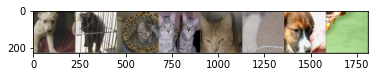

In [ ]:
out = out.numpy().transpose((1, 2, 0))
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
out = std * out + mean
out = np.clip(out, 0, 1)
plt.imshow(out)
plt.pause(0.001)

In [ ]:
inputs, classes = mixup(inputs, classes)
out = torchvision.utils.make_grid(inputs)

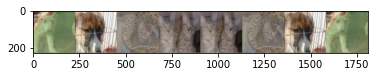

In [ ]:
out = out.numpy().transpose((1, 2, 0))
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
out = std * out + mean
out = np.clip(out, 0, 1)
plt.imshow(out)
plt.pause(0.001)

In [ ]:
mixup_args = {
    'mixup_alpha': 0.3,
    'cutmix_alpha': 0.3,
    'cutmix_minmax': None,
    'prob': 1.0,
    'switch_prob': 0.5,
    'mode': 'elem',
    'label_smoothing': 0,
    'num_classes': 10}

In [ ]:
dataset, loader, mixup = dataset_loader(mixup_args)
inputs, classes = next(iter(loader))
out = torchvision.utils.make_grid(inputs)

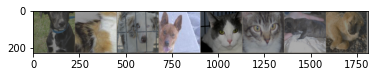

In [ ]:
out = out.numpy().transpose((1, 2, 0))
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
out = std * out + mean
out = np.clip(out, 0, 1)
plt.imshow(out)
plt.pause(0.001)

In [ ]:
print("Preparing training dataset...")
train_generator = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

print("Preparing validation dataset...")
validation_generator = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

classnames = list(train_generator.class_indices.keys())
print('Data generators ready')

Preparing training dataset...
Found 22500 images belonging to 2 classes.
Preparing validation dataset...
Found 2500 images belonging to 2 classes.
Data generators ready


In [ ]:
def train(model, data_loader, optimizer):
    # Set the model to training mode
    #model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        
        #Lan truyền tiến
        #feedforward: calculate y_pred and loss function
        optimizer.zero_grad()
        out = model(data)
        loss = nn.BCELoss()
        output = loss(out, target)
        train_loss += output.item()

        #Lan truyền ngược
        #backpropagate: compute gradient descent and update weights
        output.backward()
        optimizer.step()

    #Return average loss
    avg_loss = train_loss / (batch+1)
    print('Training set: Average loss: {:.4f}'.format(avg_loss))
    return avg_loss

In [ ]:
def test(model, data_loader):
    # Switch the model to evaluation mode (so we don't backpropagate)
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor
            # Get the predictions
            out = model(data)

            # calculate the loss
            loss_criteria = nn.BCELoss()
            test_loss += loss_criteria(out, target).item()

            # Calculate the accuracy
            #print(out.data)
            predicted = out.data > 0.5
            correct += torch.sum(target==predicted).item()
            #print(target)
            #print(predicted)
            
    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss/batch_count
    print('Validation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))
    avg_acc = correct / len(data_loader.dataset)
    
    # return average loss for the epoch
    return avg_loss, avg_acc

In [ ]:
from pandas.core.common import random_state
def train_model(l_r):
  learning_rate = l_r #0.001
  random_state=42
  optimizer = torch.optim.Adam(mobilenet.parameters(), lr=learning_rate)
  optimizer.zero_grad()

  # We'll track metrics for each epoch in these arrays
  epoch_nums = []
  training_loss = []
  validation_loss = []
  acc = []

  # Train over 50 epochs
  epochs = 5
  for epoch in range(1, epochs + 1):

      # print the epoch number
      print('Epoch: {}'.format(epoch))
      
      # Feed training data into the model to optimize the weights
      train_loss = train(base_model, train_generator, optimizer)
      
      # Feed the test data into the model to check its performance
      test_loss, test_acc = test(base_model, validation_generator)
      
      # Log the metrics for this epoch
      epoch_nums.append(epoch)
      training_loss.append(train_loss)
      validation_loss.append(test_loss)
      acc.append(test_acc)
  return (epoch_nums, training_loss, validation_loss, acc)

In [ ]:
epoch_nums, training_loss, validation_loss, acc = train_model(0.01)

Epoch: 1


##10) Giả định cần huấn luyện tiếp mô hình student với các dữ liệu mới chưa được gán nhãn. Hãy xây dựng một kĩ thuật lựa chọn mẫu dựa trên đánh giá uncertainty.